In [1]:
!pip install opencv-python numpy matplotlib mediapipe deepface tqdm yt-dlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.9/171.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=47ffbd0742e08b960cb9b542e03282f84c940b444ad4070492ddc3923ca60eca
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import os
from tqdm import tqdm
from deepface import DeepFace


25-03-09 12:38:28 - Directory /root/.deepface has been created
25-03-09 12:38:28 - Directory /root/.deepface/weights has been created


In [3]:
'''
Solution:

download it on your local first, then upload it here

run:
`pip install yt-dlp`

then run:
`yt-dlp -f "best[height<=720]" "https://www.youtube.com/watch?v=v_kTNIYsFnQ" -o "test_video.mp4"`

to download it to your current local dir

'''

# BELOW ISNT WORKING ANYMORE

# def download_video(url, output_path="test_video.mp4"):
#     """
#     Download a video from YouTube
#     """
#     # Replace 'chrome' with your browser: firefox, edge, safari, etc.
#     # Replace 'windows' with your OS: linux, darwin (for macOS), etc.
#     !yt-dlp -f "best[height<=720]" {url} -o {output_path} --cookies-from-browser chrome:macOS
#     return output_path

# # Test with a short video
# video_path = download_video("https://www.youtube.com/watch?v=v_kTNIYsFnQ", "test_video.mp4")

'\nSolution:\n\ndownload it on your local first, then upload it here\n\nrun:\n`pip install yt-dlp`\n\nthen run:\n`yt-dlp -f "best[height<=720]" "https://www.youtube.com/watch?v=v_kTNIYsFnQ" -o "test_video.mp4"`\n\nto download it to your current local dir\n\n'

In [4]:
video_path = "test_video.mp4"

In [5]:
def detect_faces_in_video(video_path, output_folder="detected_faces", sample_rate=5):
    """
    Extract faces from video frames at regular intervals
    """
    # Create output folder
    os.makedirs(output_folder, exist_ok=True)

    # Initialize MediaPipe face detector (simpler than OpenCV's DNN)
    mp_face_detection = mp.solutions.face_detection
    face_detector = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

    # Open video
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Prepare output list
    detected_faces = []

    # Process frames
    for frame_idx in tqdm(range(0, total_frames, sample_rate)):
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if not ret:
            break

        # Convert to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect faces
        results = face_detector.process(rgb_frame)

        # Process detections
        if results.detections:
            h, w = frame.shape[:2]

            for i, detection in enumerate(results.detections):
                # Get face bounding box
                bbox = detection.location_data.relative_bounding_box
                x = int(bbox.xmin * w)
                y = int(bbox.ymin * h)
                width = int(bbox.width * w)
                height = int(bbox.height * h)

                # Ensure coordinates are valid
                x = max(0, x)
                y = max(0, y)
                if x + width > w: width = w - x
                if y + height > h: height = h - y

                # Skip invalid faces
                if width <= 0 or height <= 0:
                    continue

                # Extract face image
                face_img = frame[y:y+height, x:x+width]

                # Save face image
                timestamp = frame_idx / fps
                face_filename = f"{output_folder}/frame_{frame_idx}_face_{i}.jpg"
                cv2.imwrite(face_filename, face_img)

                # Add to results
                detected_faces.append({
                    'frame': frame_idx,
                    'timestamp': timestamp,
                    'face_id': i,
                    'face_path': face_filename,
                    'bbox': (x, y, width, height)
                })

    # Close video
    cap.release()

    print(f"Detected {len(detected_faces)} faces in {len(range(0, total_frames, sample_rate))} frames")
    return detected_faces

# Extract faces
faces = detect_faces_in_video(video_path)

100%|██████████| 2310/2310 [03:44<00:00, 10.30it/s]

Detected 2586 faces in 2310 frames


In [6]:
def analyze_emotions(face_list):
    """
    Analyze emotions in detected faces
    """
    results = []

    print("Analyzing emotions...")
    for face in tqdm(face_list):
        try:
            # Analyze with DeepFace
            emotion_analysis = DeepFace.analyze(
                img_path=face['face_path'],
                actions=['emotion'],
                enforce_detection=False
            )

            # Get emotion data
            dominant_emotion = emotion_analysis[0]['dominant_emotion']
            emotion_scores = emotion_analysis[0]['emotion']

            # Store results
            results.append({
                'frame': face['frame'],
                'timestamp': face['timestamp'],
                'face_id': face['face_id'],
                'dominant_emotion': dominant_emotion,
                'emotion_scores': emotion_scores,
                'face_path': face['face_path']
            })
        except Exception as e:
            print(f"Error analyzing face {face['face_path']}: {e}")

    return results

# Analyze emotions
emotion_results = analyze_emotions(faces)

Analyzing emotions...


  0%|          | 0/2586 [00:00<?, ?it/s]

25-03-09 12:42:13 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

100%|██████████| 5.98M/5.98M [00:00<00:00, 103MB/s]
100%|██████████| 2586/2586 [01:50<00:00, 23.41it/s]


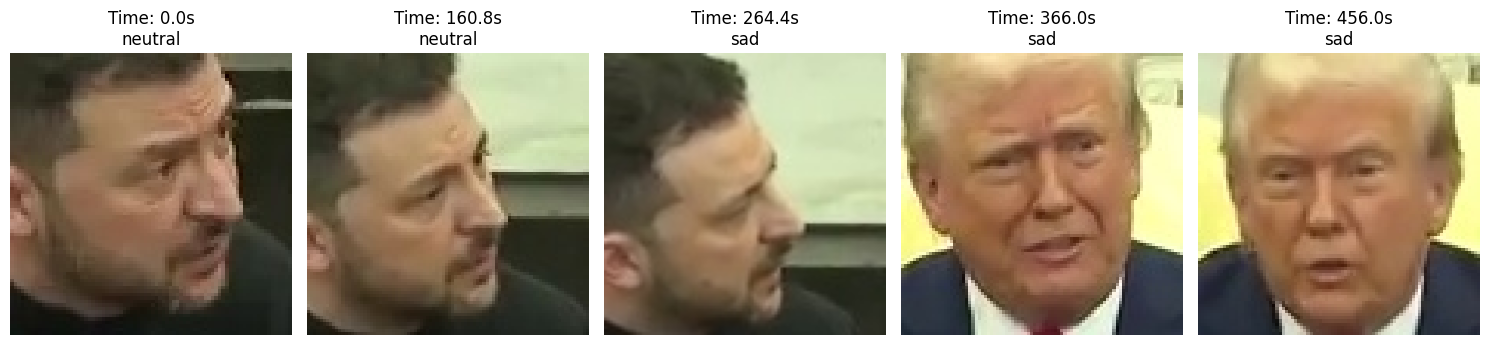

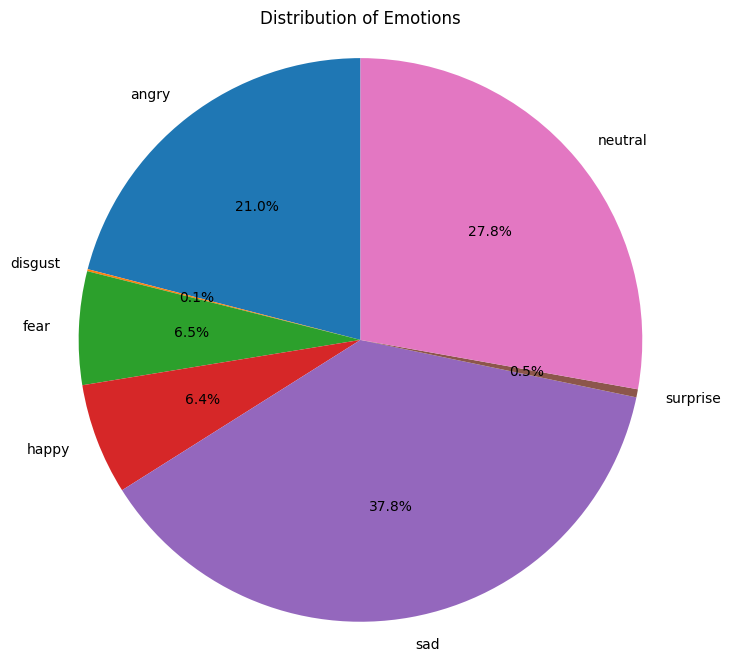

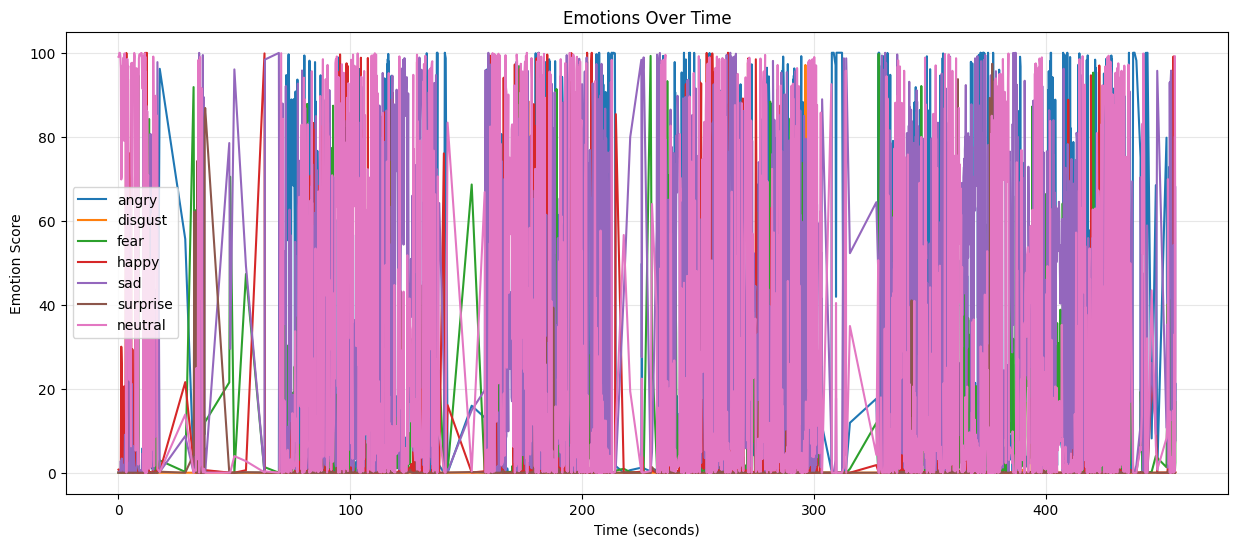

In [7]:
def visualize_results(emotion_results, num_samples=5):
    """
    Create visualizations of the emotion analysis results
    """
    # 1. Sample images with emotion labels
    if len(emotion_results) > 0:
        # Choose samples
        sample_indices = np.linspace(0, len(emotion_results)-1, num_samples, dtype=int)
        samples = [emotion_results[i] for i in sample_indices]

        # Create figure
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 4))
        if num_samples == 1:
            axes = [axes]

        # Plot samples
        for i, sample in enumerate(samples):
            # Load image
            img = cv2.imread(sample['face_path'])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Plot
            axes[i].imshow(img)
            axes[i].set_title(f"Time: {sample['timestamp']:.1f}s\n{sample['dominant_emotion']}")
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

    # 2. Emotion distribution pie chart
    emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    emotion_counts = {emotion: 0 for emotion in emotions}

    for result in emotion_results:
        emotion_counts[result['dominant_emotion']] += 1

    # Create pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        [emotion_counts[e] for e in emotions if emotion_counts[e] > 0],
        labels=[e for e in emotions if emotion_counts[e] > 0],
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title('Distribution of Emotions')
    plt.axis('equal')
    plt.show()

    # 3. Emotion over time
    timestamps = [r['timestamp'] for r in emotion_results]
    emotion_values = {emotion: [] for emotion in emotions}

    for result in emotion_results:
        for emotion in emotions:
            emotion_values[emotion].append(result['emotion_scores'].get(emotion, 0))

    # Create line chart
    plt.figure(figsize=(15, 6))
    for emotion in emotions:
        plt.plot(timestamps, emotion_values[emotion], label=emotion)

    plt.xlabel('Time (seconds)')
    plt.ylabel('Emotion Score')
    plt.title('Emotions Over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualize the results
visualize_results(emotion_results)

In [22]:
def create_improved_summary_video(video_path, emotion_results, faces_data, output_path="improved_emotion_summary.mp4"):
    """
    Create an improved summary video with:
    1. Stable bounding boxes (reduced flickering)
    2. Temporal emotion smoothing
    3. Color-coded emotions with smooth transitions
    4. Persistent tracking even when faces disappear briefly

    Parameters:
    - video_path: Path to the original video
    - emotion_results: List of dictionaries with emotion analysis results
    - faces_data: Original face detection data containing bounding boxes
    - output_path: Where to save the summary video
    """
    import os
    import cv2
    import collections
    import numpy as np
    from tqdm import tqdm
    import subprocess

    # Make the output path absolute to ensure we know where it's going
    output_path = os.path.abspath(output_path)
    print(f"Will save video to: {output_path}")

    # Open the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video {video_path}")
        return None

    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Storage for processed frames (for fallback option)
    processed_frames = []

    # Try to use a codec that works well across platforms
    try:
        if os.name == 'nt':  # Windows
            fourcc = cv2.VideoWriter_fourcc(*'H264')
        else:  # Linux/Mac
            fourcc = cv2.VideoWriter_fourcc(*'XVID')

        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        # Check if VideoWriter was initialized properly
        if not out.isOpened():
            print("First codec failed. Trying alternative...")
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

            # If still not working, try another fallback
            if not out.isOpened():
                print("Second codec failed. Trying final fallback...")
                fourcc = cv2.VideoWriter_fourcc(*'MJPG')
                out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    except Exception as e:
        print(f"Error setting up VideoWriter: {e}")
        out = None

    # Create lookup for face paths to bounding boxes
    face_path_to_bbox = {face['face_path']: face['bbox'] for face in faces_data}

    # Define colors for each emotion (BGR format)
    emotion_colors = {
        'angry': (0, 0, 255),     # Red
        'surprise': (0, 140, 255), # Orange
        'happy': (0, 255, 255),    # Yellow
        'disgust': (0, 255, 0),     # Green
        'sad': (255, 0, 0),       # Blue
        'fear': (255, 0, 255),# Magenta
        'neutral': (255, 255, 255)# White
    }

    # Create a mapping from frame number to emotion results
    frame_to_faces = {}
    for result in emotion_results:
        frame = result.get('frame', 0)
        if frame not in frame_to_faces:
            frame_to_faces[frame] = []

        # Add bbox from original detection data
        result_with_bbox = result.copy()
        result_with_bbox['bbox'] = face_path_to_bbox.get(result.get('face_path', ''), (0, 0, 50, 50))
        frame_to_faces[frame].append(result_with_bbox)

    # Initialize face tracking data
    face_trackers = {}  # Dictionary to store tracking info for each face
    next_face_id = 0    # ID for the next new face

    # Parameters for temporal smoothing
    history_size = int(fps / 2)  # 0.5 seconds of history
    min_detection_persistence = int(fps * 1.5)  # Keep tracks for 1.5 seconds after disappearing

    print("Creating improved summary video...")
    for frame_idx in tqdm(range(total_frames)):
        ret, frame = cap.read()
        if not ret:
            break

        # Current timestamp
        timestamp = frame_idx / fps

        # Get faces detected in this frame
        current_faces = frame_to_faces.get(frame_idx, [])

        # Update trackers with current detections
        current_bboxes = {idx: face['bbox'] for idx, face in enumerate(current_faces)}

        # Match current detections to existing tracks based on IOU
        matched_tracks = {}
        unmatched_detections = list(current_bboxes.keys())

        # First, try to match detections to existing tracks
        for track_id, tracker_info in face_trackers.items():
            last_bbox = tracker_info['bbox_history'][-1]
            best_match = -1
            best_iou = 0.3  # Minimum IOU threshold

            for detection_idx in unmatched_detections:
                current_bbox = current_bboxes[detection_idx]
                # Calculate IOU between previous bbox and current detection
                iou = calculate_iou(last_bbox, current_bbox)
                if iou > best_iou:
                    best_iou = iou
                    best_match = detection_idx

            if best_match >= 0:
                # Update the matched track
                matched_tracks[track_id] = best_match
                unmatched_detections.remove(best_match)

        # For each matched track, update the tracker
        for track_id, detection_idx in matched_tracks.items():
            face_data = current_faces[detection_idx]
            tracker = face_trackers[track_id]

            # Update position
            tracker['bbox_history'].append(face_data['bbox'])
            if len(tracker['bbox_history']) > min_detection_persistence:
                tracker['bbox_history'].pop(0)

            # Update emotion
            emotion = face_data['dominant_emotion']
            tracker['emotion_history'].append(emotion)
            if len(tracker['emotion_history']) > history_size:
                tracker['emotion_history'].pop(0)

            # Update last seen frame
            tracker['last_seen'] = frame_idx

        # Create new tracks for unmatched detections
        for detection_idx in unmatched_detections:
            face_data = current_faces[detection_idx]

            # Create a new track
            face_trackers[next_face_id] = {
                'bbox_history': [face_data['bbox']],
                'emotion_history': [face_data['dominant_emotion']],
                'last_seen': frame_idx
            }
            next_face_id += 1

        # Remove old tracks that haven't been seen for too long
        tracks_to_remove = []
        for track_id, tracker in face_trackers.items():
            if frame_idx - tracker['last_seen'] > min_detection_persistence:
                tracks_to_remove.append(track_id)

        for track_id in tracks_to_remove:
            del face_trackers[track_id]

        # Draw all active tracks
        for track_id, tracker in face_trackers.items():
            # Skip if the track is too old
            if frame_idx - tracker['last_seen'] > min_detection_persistence:
                continue

            # Get the smoothed bounding box
            if frame_idx - tracker['last_seen'] < 5:  # If recently seen, use the last actual detection
                bbox = tracker['bbox_history'][-1]
            else:
                # If not seen recently, use the last known position
                bbox = tracker['bbox_history'][-1]

            # Determine dominant emotion using a rolling window
            if tracker['emotion_history']:
                # Get the most common emotion in the history
                emotion_counter = collections.Counter(tracker['emotion_history'])
                dominant_emotion = emotion_counter.most_common(1)[0][0]

                # Calculate confidence as the percentage of this emotion in history
                confidence = emotion_counter[dominant_emotion] / len(tracker['emotion_history'])

                # Get the color based on the dominant emotion
                color = emotion_colors.get(dominant_emotion, (200, 200, 200))

                # Adjust color intensity based on confidence (more transparent if less confident)
                color = tuple([int(c * min(1.0, 0.5 + confidence/2)) for c in color])

                # Draw the bounding box
                x, y, w, h = [int(v) for v in bbox]
                cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)

                # Add emotion label with confidence
                label = f"{dominant_emotion} ({confidence*100:.0f}%)"
                cv2.putText(
                    frame, label, (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2
                )

        # Add timestamp
        cv2.putText(
            frame, f"Time: {timestamp:.1f}s", (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2
        )

        # Store the processed frame for possible fallback
        processed_frames.append(frame.copy())

        # Write frame to output if VideoWriter is available
        if out and out.isOpened():
            out.write(frame)

    # Release resources
    cap.release()
    if out:
        out.release()

    # Check if the video file was created successfully
    if not os.path.exists(output_path) or os.path.getsize(output_path) < 10000:  # Less than 10KB is probably an error
        print("VideoWriter approach failed. Using FFmpeg directly...")

        # Create a directory for temporary frames
        temp_dir = "temp_frames"
        os.makedirs(temp_dir, exist_ok=True)

        try:
            # Save processed frames as images
            for i, frame in enumerate(processed_frames):
                cv2.imwrite(f"{temp_dir}/frame_{i:04d}.png", frame)

            # Use FFmpeg to create video from frames
            ffmpeg_cmd = [
                "ffmpeg",
                "-framerate", str(fps),
                "-i", f"{temp_dir}/frame_%04d.png",
                "-c:v", "libx264",
                "-pix_fmt", "yuv420p",
                "-y",  # Overwrite output file if it exists
                output_path
            ]

            subprocess.run(ffmpeg_cmd, check=True)

            # Clean up temporary files
            for i in range(len(processed_frames)):
                if os.path.exists(f"{temp_dir}/frame_{i:04d}.png"):
                    os.remove(f"{temp_dir}/frame_{i:04d}.png")
        except Exception as e:
            print(f"Error during FFmpeg fallback: {e}")
        finally:
            # Make sure to remove the temp directory
            if os.path.exists(temp_dir):
                try:
                    os.rmdir(temp_dir)
                except:
                    pass

    # Final verification
    if os.path.exists(output_path):
        file_size_mb = os.path.getsize(output_path) / (1024 * 1024)
        print(f"✅ Improved summary video saved to: {output_path}")
        print(f"   File size: {file_size_mb:.2f} MB")
        return output_path
    else:
        print(f"❌ Failed to create video at: {output_path}")
        return None

# Helper function for bounding box overlap calculation
def calculate_iou(bbox1, bbox2):
    """
    Calculate Intersection over Union between two bounding boxes
    Each bbox is expected to be (x, y, w, h)
    """
    # Convert to (x1, y1, x2, y2) format
    x1_1, y1_1, w1, h1 = bbox1
    x1_2, y1_2, w2, h2 = bbox2

    x2_1, y2_1 = x1_1 + w1, y1_1 + h1
    x2_2, y2_2 = x1_2 + w2, y1_2 + h2

    # Calculate intersection area
    x_left = max(x1_1, x1_2)
    y_top = max(y1_1, y1_2)
    x_right = min(x2_1, x2_2)
    y_bottom = min(y2_1, y2_2)

    if x_right < x_left or y_bottom < y_top:
        return 0.0  # No intersection

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # Calculate union area
    bbox1_area = w1 * h1
    bbox2_area = w2 * h2
    union_area = bbox1_area + bbox2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / max(union_area, 1e-6)  # Avoid division by zero
    return iou

# Example usage:
improved_summary = create_improved_summary_video(video_path, emotion_results, faces)

Will save video to: /content/improved_emotion_summary.mp4
Creating improved summary video...


100%|██████████| 11547/11547 [01:01<00:00, 188.27it/s]


✅ Improved summary video saved to: /content/improved_emotion_summary.mp4
   File size: 108.98 MB


In [23]:
def add_voice_analysis_to_summary(video_path, emotion_results, original_summary_path=None, output_path="enhanced_summary.mp4"):
    """
    Add voice emotion analysis to an existing summary video or create a new one
    """
    import subprocess
    import librosa
    import numpy as np
    import os
    import cv2
    from tqdm import tqdm

    # Step 1: Extract audio from the video - use a direct path in the current directory
    audio_path = "extracted_audio.wav"

    print(f"Extracting audio from video to {audio_path}...")
    try:
        # Extract audio using ffmpeg with progress display
        extract_cmd = [
            "ffmpeg",
            "-i", video_path,
            "-q:a", "0",
            "-map", "a",
            audio_path,
            "-y"  # Overwrite if exists
        ]

        # Run the command and capture output
        process = subprocess.run(
            extract_cmd,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        # Check if extraction was successful
        if process.returncode != 0:
            print(f"Error extracting audio: {process.stderr}")
            print("Attempting alternative extraction method...")

            # Alternative method using os.system
            os.system(f"ffmpeg -i {video_path} -q:a 0 -map a {audio_path} -y")

    except Exception as e:
        print(f"Exception during audio extraction: {e}")
        print("Attempting alternative extraction method...")
        os.system(f"ffmpeg -i {video_path} -q:a 0 -map a {audio_path} -y")

    # Verify audio file exists before proceeding
    if not os.path.exists(audio_path):
        print(f"Warning: Audio extraction failed. The file {audio_path} does not exist.")
        print("Will proceed without voice analysis. Check that ffmpeg is installed correctly.")

        # If no audio analysis is possible, just return the original summary
        if original_summary_path and os.path.exists(original_summary_path):
            return original_summary_path
        else:
            # Create a new summary without audio analysis
            if not original_summary_path:
                from create_improved_summary_video import create_improved_summary_video
                return create_improved_summary_video(video_path, emotion_results, faces_data)
            return original_summary_path

    # Check file size to ensure it's not empty
    if os.path.getsize(audio_path) < 1000:  # Less than 1KB
        print(f"Warning: Extracted audio file is too small ({os.path.getsize(audio_path)} bytes).")
        print("Will proceed without voice analysis.")

        # Return original summary if available
        if original_summary_path and os.path.exists(original_summary_path):
            return original_summary_path
        else:
            # Create a new summary without audio analysis
            if not original_summary_path:
                from create_improved_summary_video import create_improved_summary_video
                return create_improved_summary_video(video_path, emotion_results, faces_data)
            return original_summary_path

    # Step 2: Analyze audio with robust error handling
    print("Analyzing audio emotions...")
    try:
        y, sr = librosa.load(audio_path)

        # Calculate audio features in segments
        segment_duration = 2  # seconds
        voice_emotions = []

        for i in range(0, len(y), int(sr * segment_duration)):
            segment = y[i:i + int(sr * segment_duration)]
            if len(segment) < sr:  # Skip too short segments
                continue

            try:
                # Extract basic features
                segment_energy = np.mean(librosa.feature.rms(y=segment)[0])

                # Safely calculate pitch with error handling
                try:
                    segment_pitch = librosa.yin(segment, fmin=80, fmax=400, sr=sr)
                    pitch_mean = np.mean(segment_pitch[~np.isnan(segment_pitch)])
                    if np.isnan(pitch_mean):
                        pitch_mean = 0
                except Exception as e:
                    print(f"Error calculating pitch at {i/sr:.2f}s: {e}")
                    pitch_mean = 0

                # Very simple rule-based classification
                if segment_energy > 0.05:
                    if pitch_mean > 200:
                        emotion = "excited"
                    else:
                        emotion = "assertive"
                else:
                    if pitch_mean > 180:
                        emotion = "neutral"
                    else:
                        emotion = "calm"

                voice_emotions.append({
                    'timestamp': i / sr,
                    'emotion': emotion,
                    'energy': segment_energy,
                    'pitch': pitch_mean
                })
            except Exception as e:
                print(f"Error analyzing segment at {i/sr:.2f}s: {e}")
                # Add a default neutral emotion to avoid gaps
                voice_emotions.append({
                    'timestamp': i / sr,
                    'emotion': "neutral",
                    'energy': 0.01,
                    'pitch': 0
                })

    except Exception as e:
        print(f"Error analyzing audio: {e}")
        voice_emotions = []  # Empty list if analysis fails

    # Step 3: Modify the existing summary video (or create a new one)
    if not original_summary_path or not os.path.exists(original_summary_path):
        print("No existing summary provided or found. Creating new summary...")
        # Import appropriate functions based on your setup
        try:
            from create_improved_summary_video import create_improved_summary_video
            original_summary_path = create_improved_summary_video(video_path, emotion_results, faces_data)
        except Exception as e:
            print(f"Error creating new summary: {e}")
            return None

    # Skip voice annotation if no emotions were detected
    if not voice_emotions:
        print("No voice emotions detected. Returning original summary.")
        return original_summary_path

    # Step 4: Add voice information to the video
    try:
        cap = cv2.VideoCapture(original_summary_path)
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        # Create enhanced output video
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        # Process each frame and add voice emotion data
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        print(f"Adding voice analysis to {total_frames} frames...")

        # Define voice emotion colors (BGR format)
        voice_colors = {
            'excited': (0, 255, 255),   # Yellow
            'assertive': (0, 0, 255),   # Red
            'neutral': (255, 255, 255), # White
            'calm': (255, 0, 0)         # Blue
        }

        for frame_idx in tqdm(range(total_frames)):
            ret, frame = cap.read()
            if not ret:
                break

            # Calculate current timestamp
            timestamp = frame_idx / fps

            # Find voice emotion at this timestamp
            current_voice = None
            for voice_data in voice_emotions:
                if voice_data['timestamp'] <= timestamp < voice_data['timestamp'] + segment_duration:
                    current_voice = voice_data
                    break

            # Add voice emotion text if available
            if current_voice:
                emotion = current_voice['emotion']
                color = voice_colors.get(emotion, (255, 255, 255))
                text = f"Voice: {emotion} (Energy: {current_voice['energy']:.2f})"
                cv2.putText(
                    frame, text, (10, height - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2
                )

            # Write the enhanced frame
            out.write(frame)

        # Release resources
        cap.release()
        out.release()

        print(f"Enhanced summary with voice analysis saved to {output_path}")
        return output_path

    except Exception as e:
        print(f"Error creating enhanced summary: {e}")
        return original_summary_path

    finally:
        # Clean up the audio file
        try:
            if os.path.exists(audio_path):
                os.remove(audio_path)
                print(f"Cleaned up temporary audio file: {audio_path}")
        except Exception as e:
            print(f"Could not clean up audio file: {e}")

In [24]:
import os
import subprocess
import cv2
from tqdm import tqdm

# Convert the video to a more OpenCV-friendly format
def convert_to_compatible_format(input_path, output_path="compatible_video.mp4"):
    print(f"Converting {input_path} to OpenCV-compatible format...")

    # Use ffmpeg to convert with compatible codec
    cmd = [
        "ffmpeg", "-i", input_path,
        "-c:v", "libx264", "-preset", "medium",
        "-c:a", "aac", "-b:a", "128k",
        "-pix_fmt", "yuv420p",  # This format is widely compatible
        output_path,
        "-y"  # Overwrite if exists
    ]

    subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    if os.path.exists(output_path):
        print(f"Successfully converted to {output_path}")
        return output_path
    else:
        print("Conversion failed")
        return None

# Alternative approach using direct frame extraction and rebuilding
def rebuild_summary_with_voice(video_path, improved_summary_path, emotion_results, output_path="enhanced_rebuilt.mp4"):
    # Extract audio
    audio_path = "extracted_audio.wav"
    os.system(f"ffmpeg -i {video_path} -q:a 0 -map a {audio_path} -y")

    # Analyze audio (simplified for this example)
    import librosa
    import numpy as np

    print("Analyzing audio emotions...")
    try:
        y, sr = librosa.load(audio_path)
        segment_duration = 2
        voice_emotions = []

        # Process audio in segments
        for i in range(0, len(y), int(sr * segment_duration)):
            segment = y[i:i + int(sr * segment_duration)]
            if len(segment) < sr:
                continue

            segment_energy = np.mean(librosa.feature.rms(y=segment)[0])

            # Simple classification
            emotion = "neutral"
            if segment_energy > 0.05:
                emotion = "assertive"

            voice_emotions.append({
                'timestamp': i / sr,
                'emotion': emotion,
                'energy': segment_energy
            })
    except Exception as e:
        print(f"Audio analysis error: {e}")
        voice_emotions = []

    # Try to open the improved summary (may fail, but we try)
    cap = cv2.VideoCapture(improved_summary_path)
    if not cap.isOpened():
        print("Cannot open improved summary. Rebuilding from original video...")
        cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Cannot open either video. Aborting.")
        return None

    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Create output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print(f"Processing {total_frames} frames...")
    for frame_idx in tqdm(range(total_frames)):
        ret, frame = cap.read()
        if not ret:
            break

        # Current timestamp
        timestamp = frame_idx / fps

        # Add voice emotion if available
        current_voice = None
        for voice_data in voice_emotions:
            if voice_data['timestamp'] <= timestamp < voice_data['timestamp'] + segment_duration:
                current_voice = voice_data
                break

        if current_voice:
            text = f"Voice: {current_voice['emotion']} (Energy: {current_voice['energy']:.2f})"
            cv2.putText(
                frame, text, (10, height - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2
            )

        # Write frame
        out.write(frame)

    # Release resources
    cap.release()
    out.release()

    if os.path.exists(audio_path):
        os.remove(audio_path)

    print(f"Enhanced video saved to {output_path}")
    return output_path

# Try both approaches
compatible_video = convert_to_compatible_format("./improved_emotion_summary.mp4")
if compatible_video:
    enhanced_summary = add_voice_analysis_to_summary(
        video_path=video_path,
        emotion_results=emotion_results,
        original_summary_path=compatible_video,
        output_path="./enhanced_summary.mp4"
    )
else:
    # If conversion fails, use direct approach
    enhanced_summary = rebuild_summary_with_voice(
        video_path=video_path,
        improved_summary_path="./improved_emotion_summary.mp4",
        emotion_results=emotion_results
    )

print(f"Final enhanced summary path: {enhanced_summary}")

Converting ./improved_emotion_summary.mp4 to OpenCV-compatible format...
Successfully converted to compatible_video.mp4
Extracting audio from video to extracted_audio.wav...
Analyzing audio emotions...
Adding voice analysis to 11547 frames...


100%|██████████| 11547/11547 [00:45<00:00, 254.27it/s]


Enhanced summary with voice analysis saved to ./enhanced_summary.mp4
Cleaned up temporary audio file: extracted_audio.wav
Final enhanced summary path: ./enhanced_summary.mp4


In [26]:
def add_audio_to_summary_video(original_video_path, summary_video_path, output_path="summary_with_audio.mp4"):
    """
    Add the original audio track to the summary video

    Parameters:
    original_video_path: Path to the original video with audio
    summary_video_path: Path to the summary video without audio
    output_path: Path to save the new video with audio
    """
    import subprocess

    # FFmpeg command to extract audio from original video and combine with summary video
    command = [
        "ffmpeg",
        "-i", summary_video_path,  # Input video without audio
        "-i", original_video_path,  # Original video with audio
        "-c:v", "copy",            # Copy video stream without re-encoding
        "-map", "0:v",             # Use video from the first input (summary video)
        "-map", "1:a",             # Use audio from the second input (original video)
        "-shortest",               # End when the shortest input ends
        output_path,               # Output path
        "-y"                       # Overwrite if exists
    ]

    print("Adding audio to summary video...")
    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(f"Summary video with audio saved to: {output_path}")

    return output_path

# Add audio to the existing summary video
final_video = add_audio_to_summary_video(
    original_video_path=video_path,           # Original video with audio
    summary_video_path="enhanced_summary.mp4",  # Your existing summary without audio
    output_path="final_summary_with_audio.mp4"
)

Adding audio to summary video...
Summary video with audio saved to: final_summary_with_audio.mp4
